# Demo for estimating entropy production from non-stationary trajectories 

<small><i>Shun Otsubo</i></small>

**Purpose** :  Explain how to use LearnEntropy for non-stationary trajectories, and provide the code overview.

**Reference** : <br>
&emsp;[1] [Otsubo, Ito, Dechant, and Sagawa, Phys. Rev. E 101, 062106, 2020](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.101.062106)<br>
&emsp;[2] [Otsubo, Sreekanth, Sagawa and Krishnamurthy, arXiv:2010.03852, 2020](https://arxiv.org/abs/2010.03852)


### Contents

#### 1. Quick guide

#### 2. Code overview
  - Data array
  - Objective function
  - Neural networks FNNt and FNNKt 

## 1. Quick guide

You can estimate the time-dependent entropy production rate and thermodynamic force from non-stationary trajectories.
The estimation procedure is almost the same with the stationary case.
Please read *demo_stationary.ipynb* first, if you haven't already.<br>
&emsp; Here is a minimum demonstration. It may take around ten minutes on a laptop computer.

In [3]:
import main, toy, param, utils
%config InlineBackend.figure_format = 'retina'

data_id = 3
estimate_id = 1
seed = 0

# Generate trajectory data
toy.adaptation(data_id, n_traj = 1000, n_sample=100, dt=10**(-4),
                m_error=0,     # Measurement error (m_error specifies the std of the white noise)
                t_error=0,      # Synchronization error (sampling starts at t = uniform_random(0, t_error))
                rand_seed=seed    # Ensure the reproducibility
               )
               
# Edit param 
param.stationary = False
param.dim = 2
param.dt = 10**(-4)
param.n_traj = 1000
param.t_init = 0
param.t_fin = 0.01
param.x_axis = 0
param.y_axis = 1

param.n_gradient_ascent = 5000
param.which_model = "FNNKt"
param.which_rep = "Simple"
param.which_estimator = "Var"
param.n_layer = 2

# Main program
main.estimate_entropy(data_id, estimate_id, rand_seed=seed)

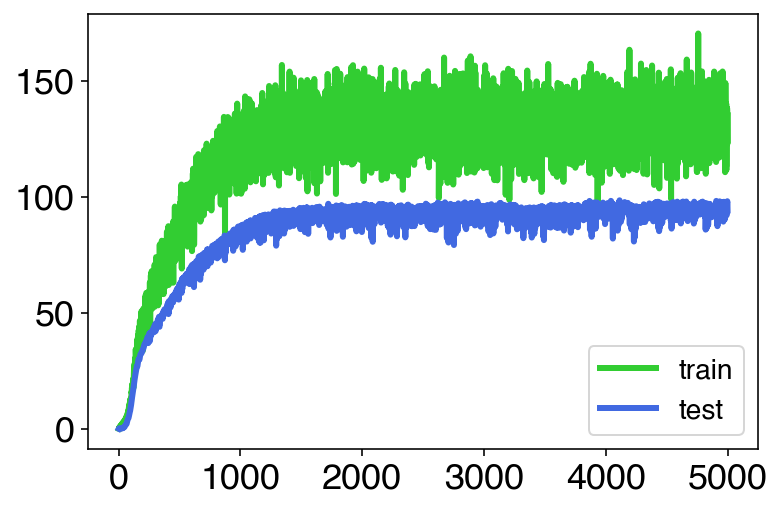

In [4]:
# Plot the learning curve
utils.plot_learning_curve(
    'Result/train' + str(data_id) + '_' + str(estimate_id) + '.txt',
    'Result/test' + str(data_id) + '_' + str(estimate_id) + '.txt'
)

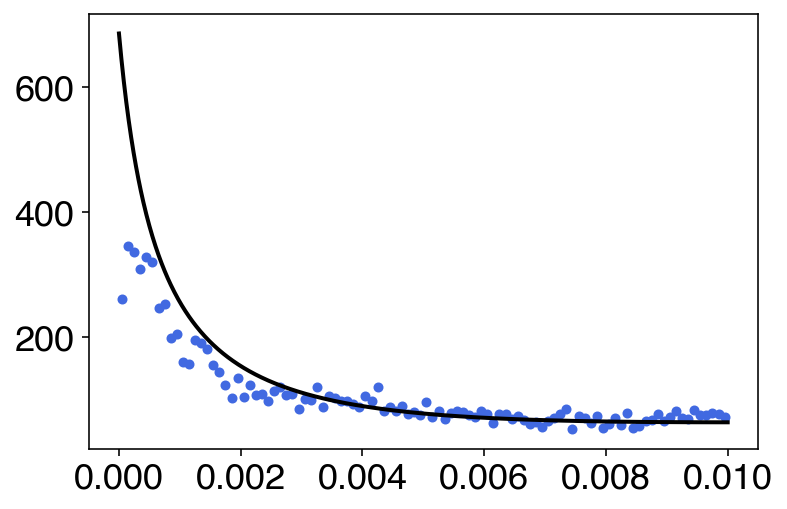

In [7]:
# Plot the time-dependent entropy production rate
utils.plot_epr('Result/epr'+str(data_id)+'_'+str(estimate_id)+'.txt',
               toy.epr_adaptation    # If you know the true entropy production rate function, you can specify it here.
              )